# 당뇨병 회귀

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df  = pd.read_csv('../static/data/diabetes_train.csv')
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.063635,-0.044642,-0.033151,-0.033214,0.001183,0.024051,-0.024993,-0.002592,-0.022512,-0.059067,214.0
1,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072128,0.011349,98.0
2,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207,127.0
3,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362,233.0
4,-0.074533,-0.044642,-0.010517,-0.005671,-0.066239,-0.057054,-0.002903,-0.039493,-0.042572,-0.001078,168.0


### target과 임의의 feature에 대한 회귀식

In [3]:
feature = 'bp'

In [8]:
X = df[feature].values.reshape(-1, 1)
y = df.target.values
X.shape, y.shape

((331, 1), (331,))

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(X, y)

LinearRegression()

In [11]:
weight, bias = lr.coef_, lr.intercept_
print(weight)
print(bias)

[686.11222571]
148.91869337400198


### 테스트 데이터셋

In [12]:
df_test  = pd.read_csv('../static/data/diabetes_test.csv')
df_test.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.034443,-0.044642,-0.007284,0.014987,-0.044223,-0.037326,-0.002903,-0.039493,-0.021394,0.007207,155.0
1,-0.009147,-0.044642,0.037984,-0.040099,-0.024960,-0.003819,-0.043401,0.015858,-0.005145,0.027917,167.0
2,0.005383,0.050680,-0.001895,0.008101,-0.004321,-0.015719,-0.002903,-0.002592,0.038393,-0.013504,185.0
3,-0.052738,-0.044642,-0.055785,-0.036656,0.089244,-0.003193,0.008142,0.034309,0.132373,0.003064,109.0
4,0.016281,-0.044642,-0.063330,-0.057314,-0.057983,-0.048912,0.008142,-0.039493,-0.059473,-0.067351,65.0


In [13]:
df_test.shape

(111, 11)

In [14]:
index = 20

In [15]:
X_test = df_test[feature][index]        # X_test = df_test.iloc[index, :-1].values
y_test = df_test.target[index]
X_test, y_test

(-0.0779708951233958, 60.0)

In [16]:
pred = X_test * weight[0] + bias        
pred

95.42190898027495

### 시각화

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [17]:
y_min = np.min(X) * weight[0] + bias
y_max = np.max(X) * weight[0] + bias

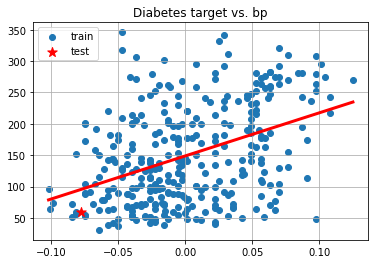

In [20]:
plt.scatter(X, y, label='train')
plt.plot([np.min(X), np.max(X)], [y_min, y_max], 'r', lw=3)
plt.scatter([X_test], [y_test], c='r', marker='*', s=100, label='test')
plt.grid()
plt.legend()
plt.title(f'Diabetes target vs. {feature}')
plt.show()